In [23]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC


In [47]:
# download the dataset
url= "creditcard.csv"

# read the input data
data=pd.read_csv(url)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


[284315    492]


C:\Users\divya\AppData\Local\Temp\ipykernel_17136\1821279900.py:8: MatplotlibDeprecationWarning: Passing the explode parameter of pie() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  ax.pie(sizes,labels,autopct = '%1.3f%%')


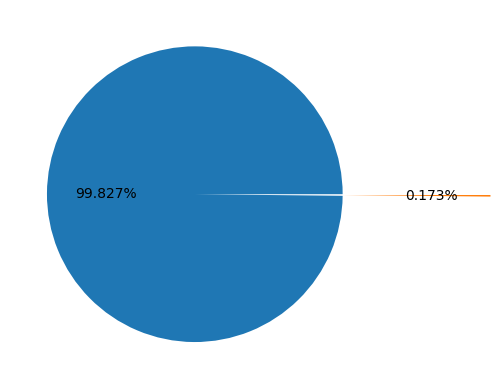

In [14]:
#get distinct classes 
labels = data.Class.unique()

#get the count of each class 
sizes = data.Class.value_counts().values
print(sizes)
fig,ax = plt.subplots()
ax.pie(sizes,labels,autopct = '%1.3f%%')
plt.show()

<Axes: >

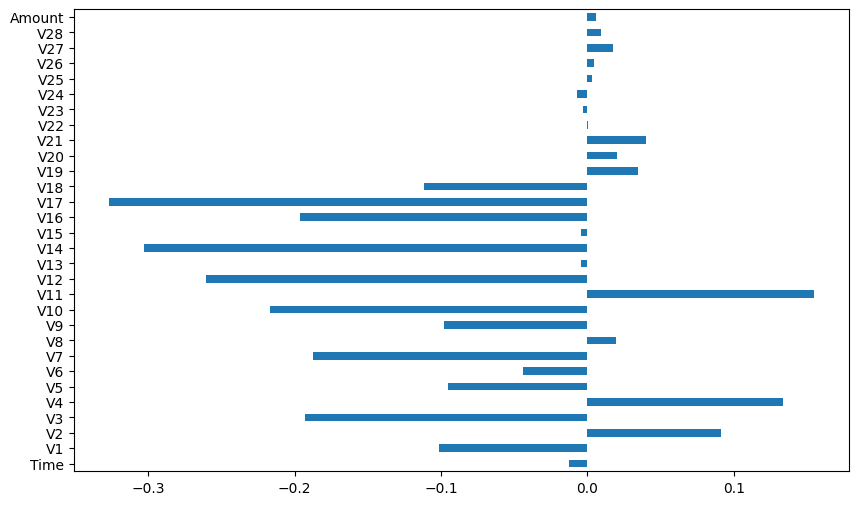

In [25]:
corr_value = data.corr()['Class'].drop('Class')
corr_value.plot(kind = 'barh',figsize = (10,6))

In [28]:

# standardize features by removing the mean and scaling to unit variance
data.iloc[:, 1:30] = StandardScaler().fit_transform(data.iloc[:, 1:30])
data_matrix = data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")
print(X)

[[-0.05617142 -0.00356612  0.13534477 ...  0.02677257 -0.00516056
   0.01982016]
 [ 0.0617268   0.01634993  0.01113799 ... -0.00225765  0.00452505
  -0.03474114]
 [-0.02686875 -0.0314435   0.0453095  ... -0.00531318 -0.00701341
   0.04496923]
 ...
 [ 0.0576644  -0.01073436 -0.12610577 ...  0.0006494  -0.00473467
  -0.00481541]
 [-0.00560415  0.01466604  0.02115195 ...  0.01230823  0.0144577
  -0.01430073]
 [-0.02071875 -0.00874144  0.03529059 ... -0.00045525  0.00314588
   0.03913181]]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# for reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)
w_train = compute_sample_weight('balanced', y_train)
#Evaluate the Decision Tree Classifier Models
y_pred_dt = dt.predict_proba(X_test)[:, 1]

In [41]:
#SVM
svm = LinearSVC(class_weight = 'balanced' , random_state = 31 , loss = "hinge",fit_intercept = False)
svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [49]:
#Evaluate the Decision Tree Classifier Models
y_pred_dt = dt.predict_proba(X_test)[:, 1]

Using these probabilities, we can evaluate the Area Under the Receiver Operating Characteristic Curve (ROC-AUC) score as a metric of model performance. The AUC-ROC score evaluates your model's ability to distinguish positive and negative classes considering all possible probability thresholds. The higher its value, the better the model is considered for separating the two classes of values.

In [50]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.939


In [52]:
y_pred_svm = svm.decision_function(X_test)

In [53]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986


In [56]:
correlation_values = abs(data.corr()['Class']).drop('Class')
correlation_values = correlation_values.sort_values(ascending=False)[:6]
correlation_values

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
Name: Class, dtype: float64